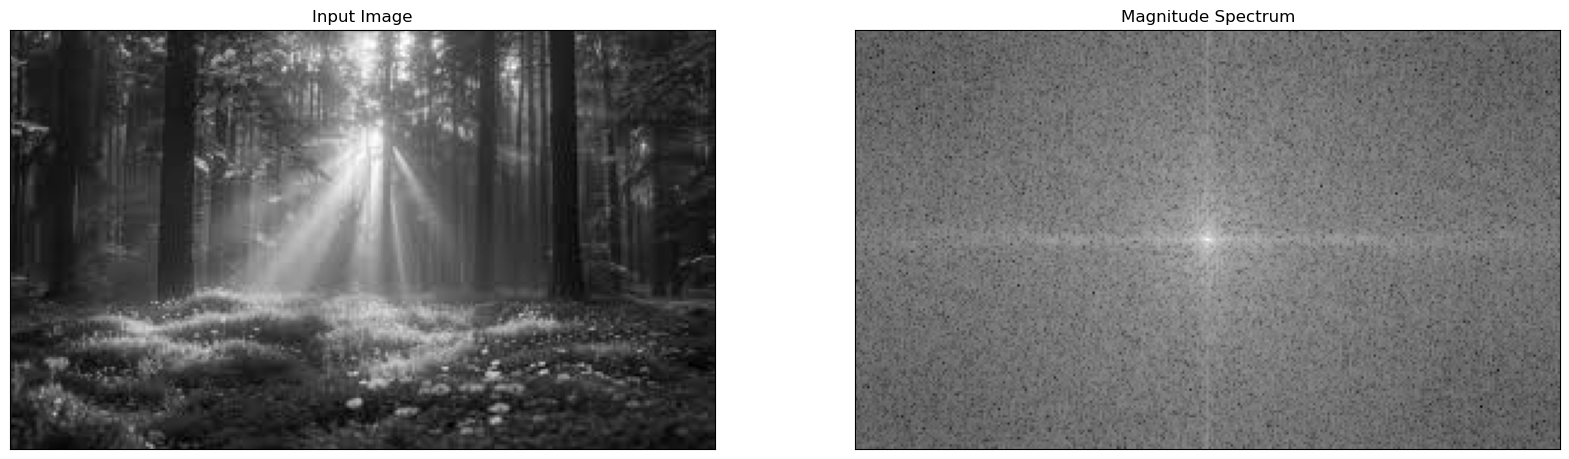

C:\Users\Student\AppData\Local\Temp\ipykernel_20268\2609680553.py:86: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered))


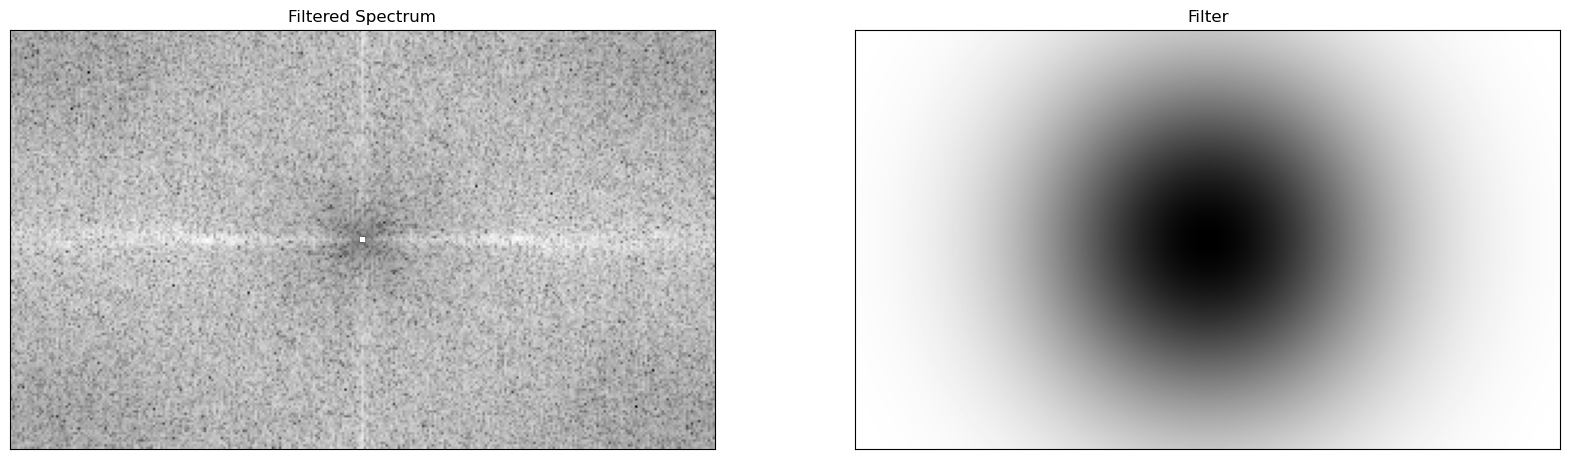

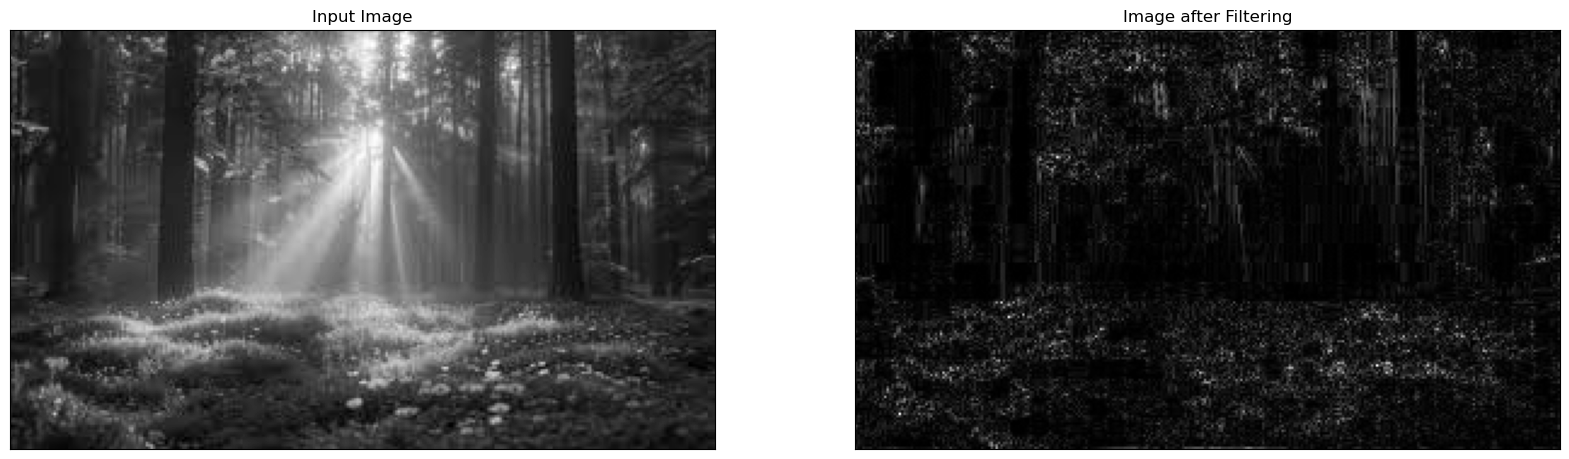

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\Student\Desktop\images\download (3).jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img is None:
    print("Error: Image not loaded correctly. Please check the file path.")
else:
    # Perform Fourier transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    # Magnitude Spectrum for plotting
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Plot the original image and its magnitude spectrum
    plt.figure(figsize=(20, 20))
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Define filter functions
    def get_filter(r, c, w1, w2=None, mode='lpf'):
        if mode == 'lpf' or mode == 'hpf':
            pf = np.zeros((r, c), dtype='uint8')
            crow, ccol = r // 2, c // 2
            cv2.circle(pf, (ccol, crow), w1, 1, -1)
            if mode == 'lpf':
                return pf
            if mode == 'hpf':
                return 1 - pf
        elif mode == 'bpf' or mode == 'bsf':
            hpf = get_filter(r=r, c=c, w1=w1, mode='hpf')
            lpf = get_filter(r=r, c=c, w1=w2, mode='lpf')
            bpf = hpf * lpf
            if mode == 'bpf':
                return bpf
            if mode == 'bsf':
                return 1 - bpf
        elif mode in ('blpf', 'bhpf', 'glpf', 'ghpf'):
            w, h = c, r
            x, y = np.meshgrid(np.arange(w), np.arange(h))
            center = (w // 2, h // 2)
            z = np.sqrt((x - center[0])**2 + (y - center[1])**2)
            if mode in ('blpf', 'bhpf'):
                b = 1 / (1 + (z / w1)**2)
                if mode == 'blpf':
                    return b
                if mode == 'bhpf':
                    return 1 - b
            if mode in ('glpf', 'ghpf'):
                b = np.exp(-z**2 / (2 * (w1**2)))
                if mode == 'glpf':
                    return b
                if mode == 'ghpf':
                    return 1 - b
        return None

    def apply_filter(f_shifted, w1=50, w2=None, mode='lpf', return_filter=False):
        rows, cols = f_shifted.shape
        pf = get_filter(r=rows, c=cols, w1=w1, w2=w2, mode=mode)
        filtered = f_shifted * pf
        if return_filter:
            return filtered, pf
        return filtered

    # Apply the filter
    filter_name = 'ghpf'  # Choose the filter type
    w1 = 50
    w2 = None
    fshift_filtered, filter_mask = apply_filter(f_shifted=fshift, w1=w1, w2=w2, mode=filter_name, return_filter=True)

    # Inverse Fourier transform to get the filtered image
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Plot the filtered spectrum, the filter, and the filtered image
    plt.figure(figsize=(20, 20))
    magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered))
    plt.subplot(121), plt.imshow(magnitude_spectrum_filtered, cmap='gray')
    plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(filter_mask, cmap='gray')
    plt.title('Filter'), plt.xticks([]), plt.yticks([])
    plt.show()

    plt.figure(figsize=(20, 20))
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_back, cmap='gray')
    plt.title('Image after Filtering'), plt.xticks([]), plt.yticks([])
    plt.show()
